In [20]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv("Clean_Dataset.csv") 

In [21]:
# 3. Overview of the data
display(df.head())
display(df.info())
display(df.describe())

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


None

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [3]:
# 4. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [4]:
# 5. Unique values per categorical column
categorical_cols = ["airline", "flight", "source_city", "departure_time",
                    "stops", "arrival_time", "destination_city", "class"]
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())


airline: 6 unique values
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

flight: 1561 unique values
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

source_city: 6 unique values
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

departure_time: 6 unique values
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

stops: 3 unique values
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

arrival_time: 6 unique values
Night            91538
Evening          78323
Mornin

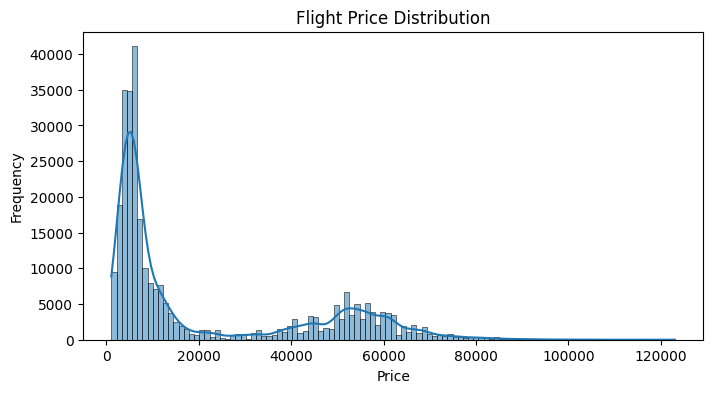

In [5]:
# 6. Visualize target distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

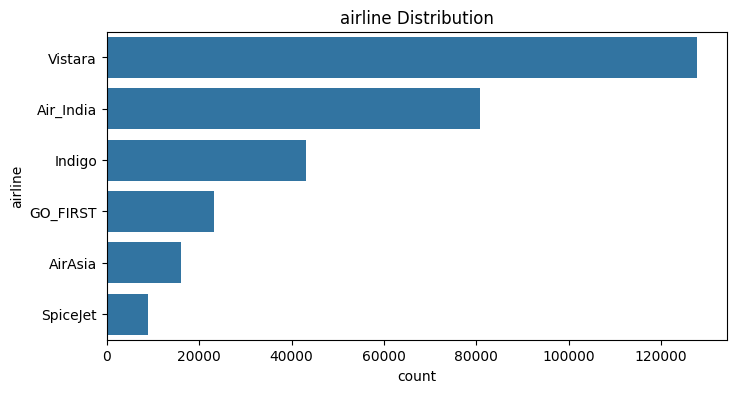

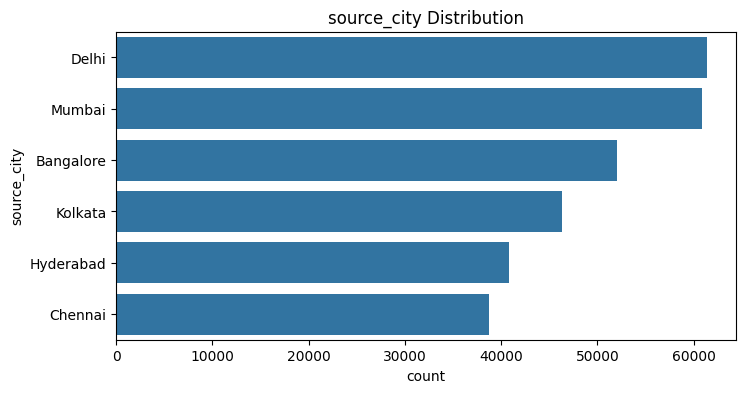

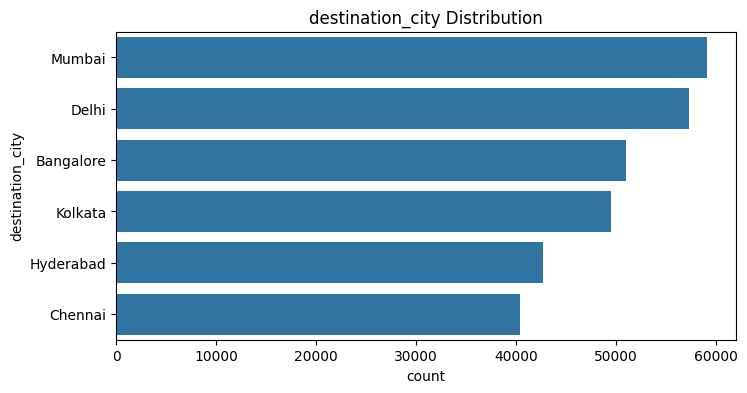

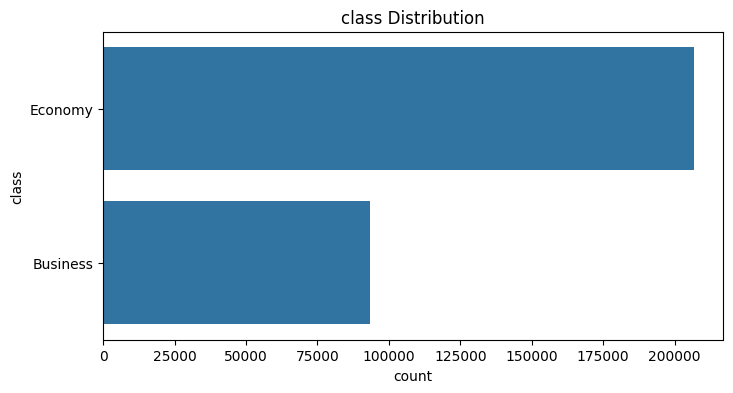

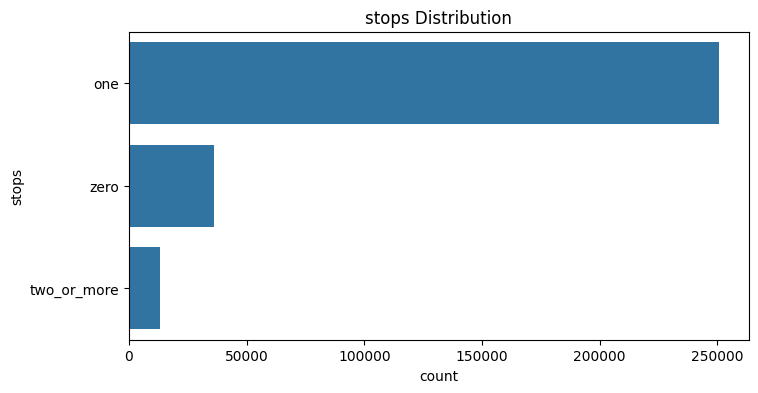

In [6]:
# 7. Visualize categorical features
for col in ["airline", "source_city", "destination_city", "class", "stops"]:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.show()


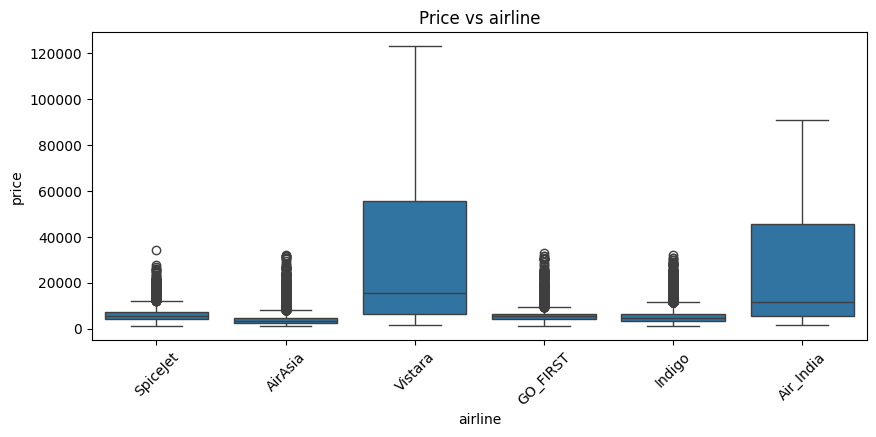

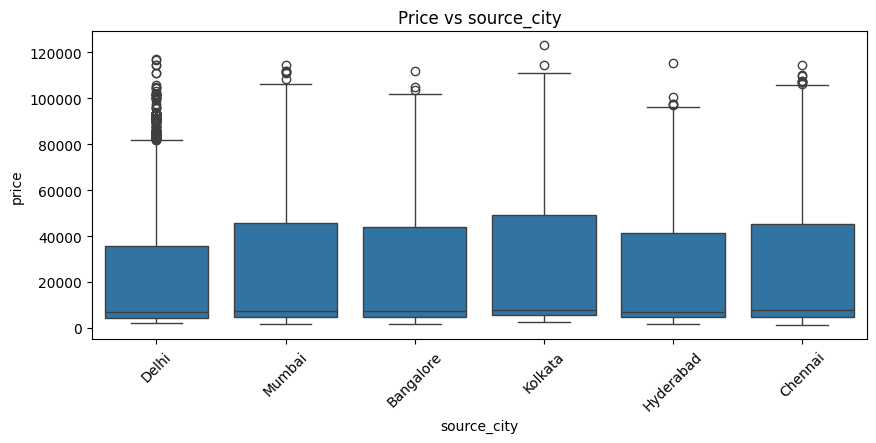

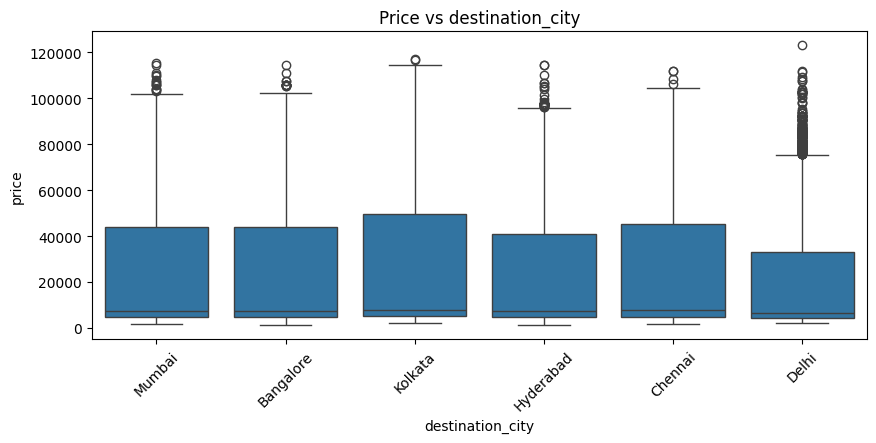

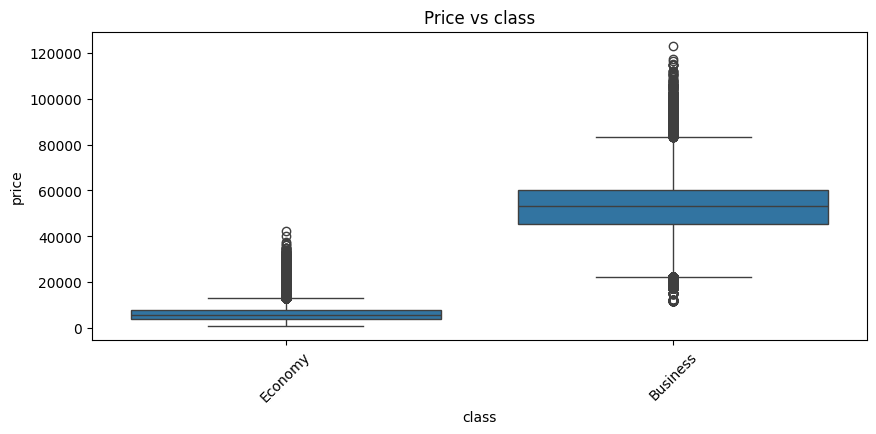

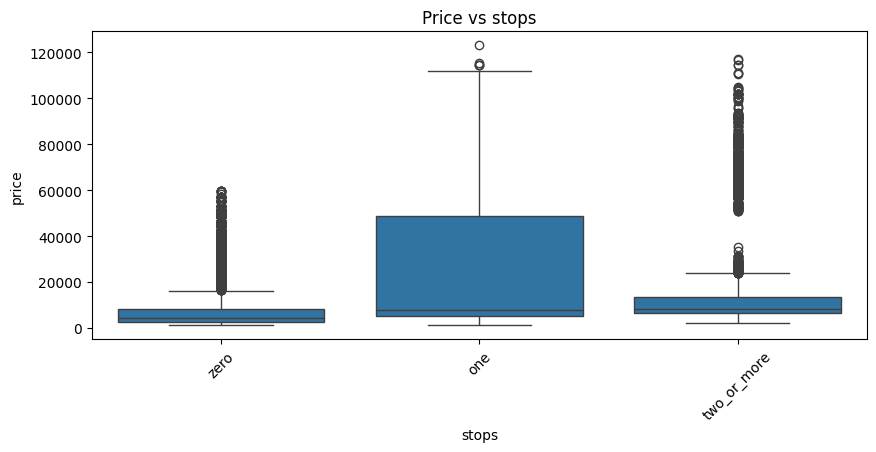

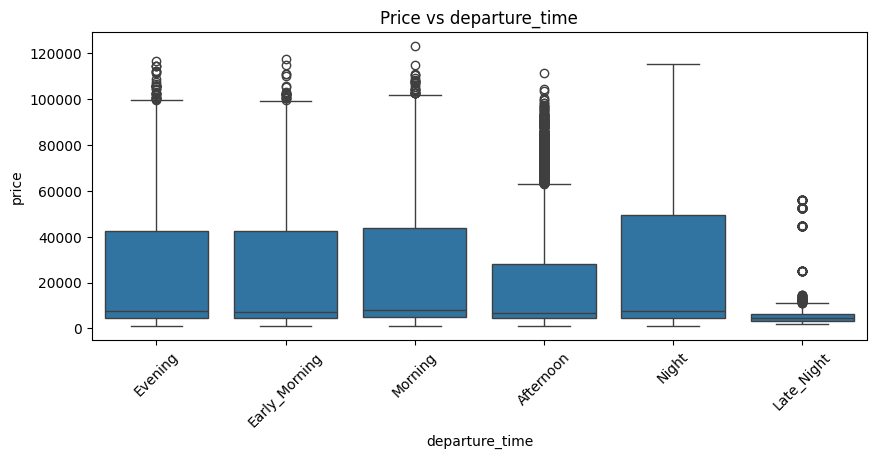

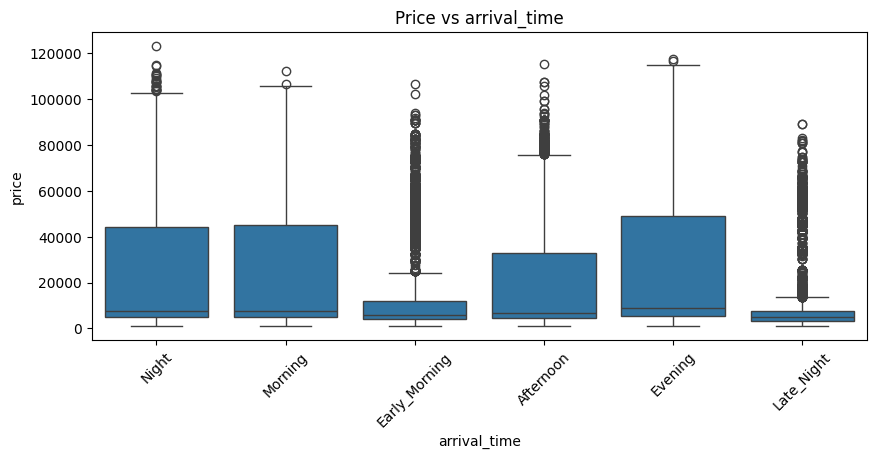

In [7]:
# 8. Boxplots: Price vs categorical features
for col in ["airline", "source_city", "destination_city", "class", "stops", "departure_time", "arrival_time"]:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y="price", data=df)
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)
    plt.show()

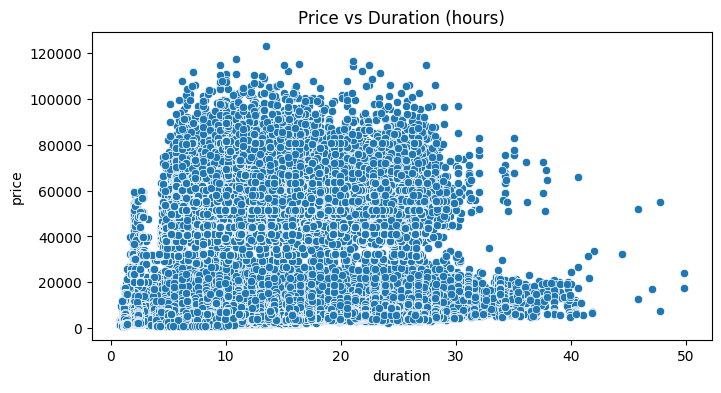

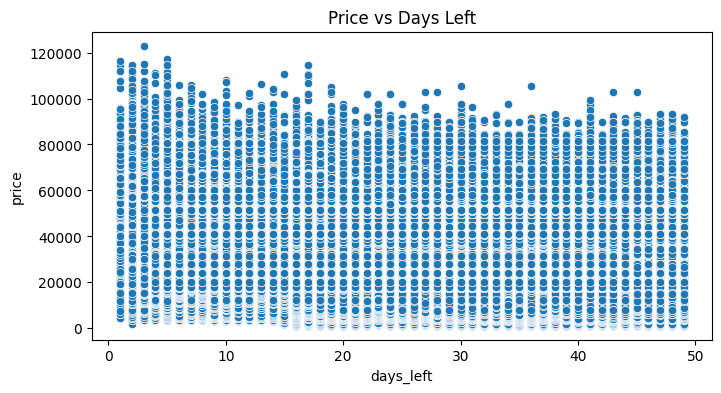

In [8]:
# 9. Price vs Duration and Days Left
plt.figure(figsize=(8, 4))
sns.scatterplot(x="duration", y="price", data=df)
plt.title('Price vs Duration (hours)')
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x="days_left", y="price", data=df)
plt.title('Price vs Days Left')
plt.show()

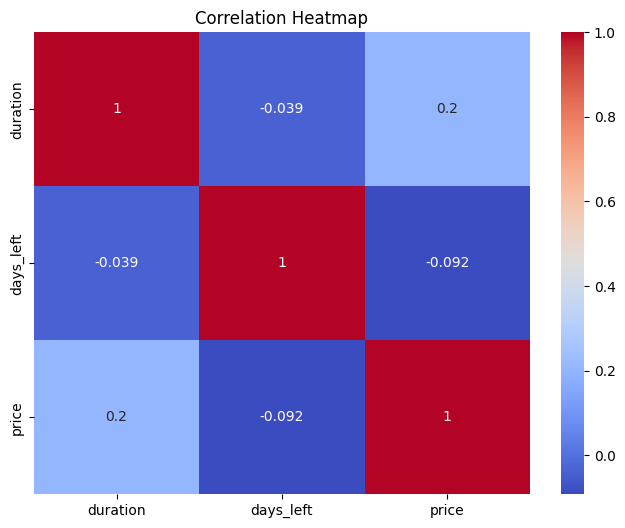

In [9]:
# 10. Correlation heatmap (only relevant for continuous features)
plt.figure(figsize=(8, 6))
sns.heatmap(df[["duration", "days_left", "price"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Encode categorical features first (e.g., with one-hot or ordinal)
X_encoded = pd.get_dummies(df[feature_list], drop_first=True)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]
print(vif_data.sort_values("VIF", ascending=False))


NameError: name 'feature_list' is not defined

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and contains only relevant columns
categorical_cols = ['departure_time', 'arrival_time']

df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

In [ ]:
# Add duration to the one-hot encoded dataframe
df_encoded['duration'] = df['duration']

In [ ]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Show correlation of each arrival_time feature with duration and departure_time features
arrival_cols = [col for col in df_encoded.columns if 'arrival_time_' in col]
departure_cols = [col for col in df_encoded.columns if 'departure_time_' in col]

print("Correlation of Arrival Time with Duration:")
print(correlation_matrix.loc['duration', arrival_cols].sort_values(ascending=False))

print("\nCorrelation of Arrival Time with Departure Time features:")
for arrival_col in arrival_cols:
    print(f"\n{arrival_col} correlations:")
    print(correlation_matrix.loc[arrival_col, departure_cols].sort_values(ascending=False))

Correlation of Arrival Time with Duration:
arrival_time_Morning          0.122935
arrival_time_Evening          0.033048
arrival_time_Early_Morning    0.010974
arrival_time_Night           -0.064452
arrival_time_Late_Night      -0.107289
Name: duration, dtype: float64

Correlation of Arrival Time with Departure Time features:

arrival_time_Early_Morning correlations:
departure_time_Late_Night       0.099506
departure_time_Night            0.072352
departure_time_Evening          0.046927
departure_time_Early_Morning   -0.008906
departure_time_Morning         -0.070975
Name: arrival_time_Early_Morning, dtype: float64

arrival_time_Evening correlations:
departure_time_Morning          0.102208
departure_time_Early_Morning    0.026135
departure_time_Late_Night      -0.028447
departure_time_Night           -0.068705
departure_time_Evening         -0.073435
Name: arrival_time_Evening, dtype: float64

arrival_time_Late_Night correlations:
departure_time_Evening          0.099987
departure_ti

##check linearity

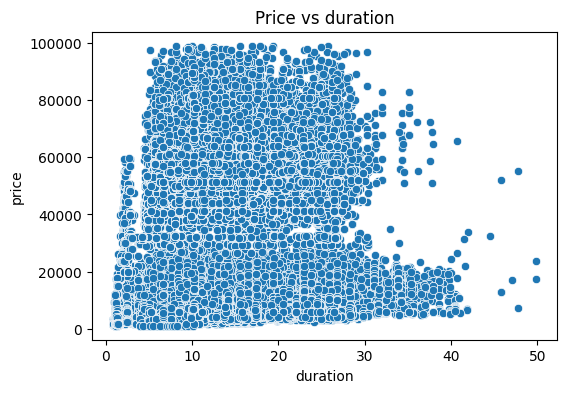

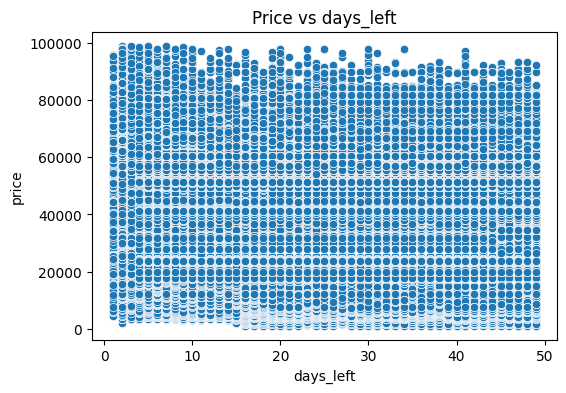

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['duration', 'days_left']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col}')
    plt.show()


In [ ]:
#person correlation
print(df[['price', 'duration', 'days_left']].corr()['price'])

price        1.000000
duration     0.204355
days_left   -0.090259
Name: price, dtype: float64


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assume X is your dataframe with features (numeric or properly encoded)
X = pd.get_dummies(df.drop(columns=['price']), drop_first=True)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values('VIF', ascending=False))

: 

In [ ]:
# 11. Handle missing data
# (If any - for this cleaned dataset, likely none, but code is here if needed)
df = df.dropna()  # or use df.fillna(method='ffill') or custom logic


In [ ]:
# Calculate IQR for 'Price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


In [ ]:
# 12. Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_enc_cols = ["Airline", "Flight", "Source City", "Departure Time",
                  "Stops", "Arrival Time", "Destination City", "Class"]
le_dict = {}
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  

In [ ]:
# 13. Feature summary after encoding
display(df.head())

In [ ]:
# 14. Save processed data for modeling
df.to_csv("../data/flight_fare_processed.csv", index=False)
print("Processed data saved to flight_fare_processed.csv")

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load your dataset ---
# Assuming your data is in a CSV file named 'flight_price.csv'.
# If you already have it loaded into a DataFrame named 'df', you can skip this.
try:
    df = pd.read_csv('Clean_Dataset.csv')
    # The 'Unnamed: 0' column seems like an old index, let's drop it.
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
except FileNotFoundError:
    print("Please make sure your data is in a file named 'flight_price.csv' or load it manually into a DataFrame called 'df'.")
    # Create a dummy dataframe for demonstration if file not found
    data = {
        'price': np.concatenate([np.random.randint(2000, 15000, 200), np.random.randint(40000, 90000, 100)]),
        'class': ['Economy'] * 200 + ['Business'] * 100,
        'days_left': np.random.randint(1, 50, 300),
        'duration': np.random.uniform(1, 45, 300)
    }
    df = pd.DataFrame(data)


# Set the style for the plots for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

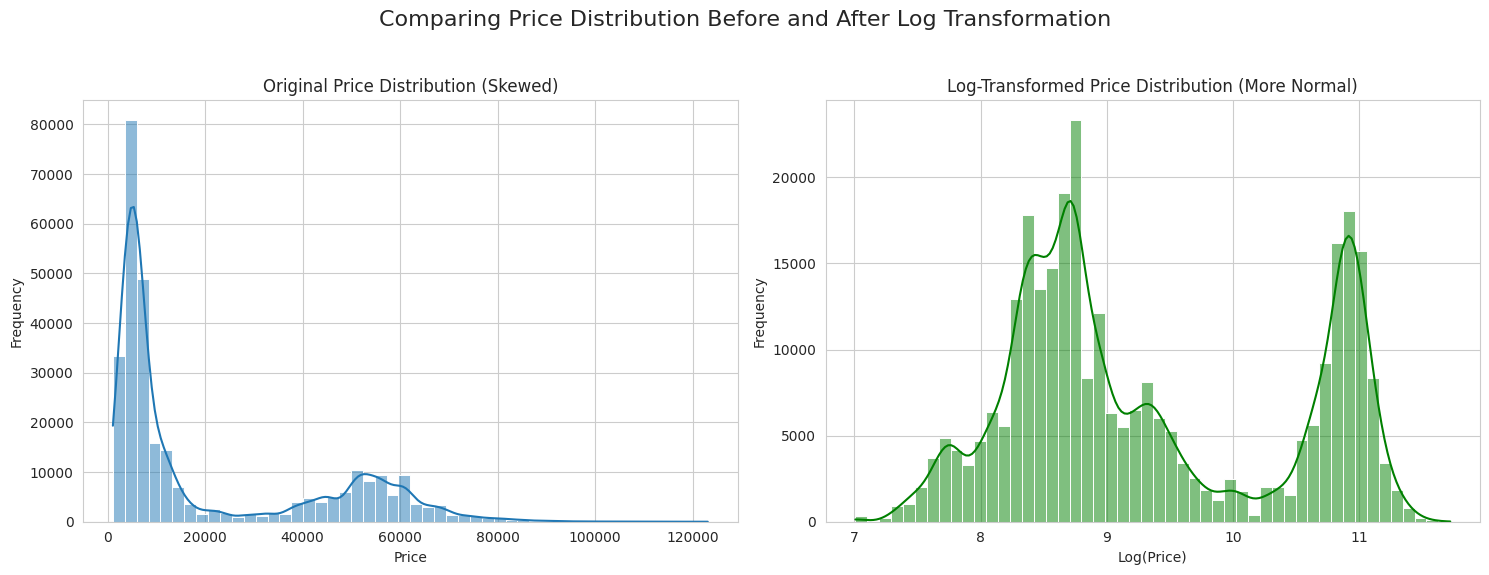

In [12]:
# --- 1. Log Transformation of Price ---
# Apply a log1p transformation, which calculates log(1 + x).
# This is generally preferred over np.log() to avoid errors if price is 0.
df['log_price'] = np.log1p(df['price'])

# Create a figure with two subplots to compare distributions
plt.figure(figsize=(15, 6))

# Plot original price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Original Price Distribution (Skewed)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot log-transformed price distribution
plt.subplot(1, 2, 2)
sns.histplot(df['log_price'], kde=True, bins=50, color='green')
plt.title('Log-Transformed Price Distribution (More Normal)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# Display the plots
plt.suptitle('Comparing Price Distribution Before and After Log Transformation', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


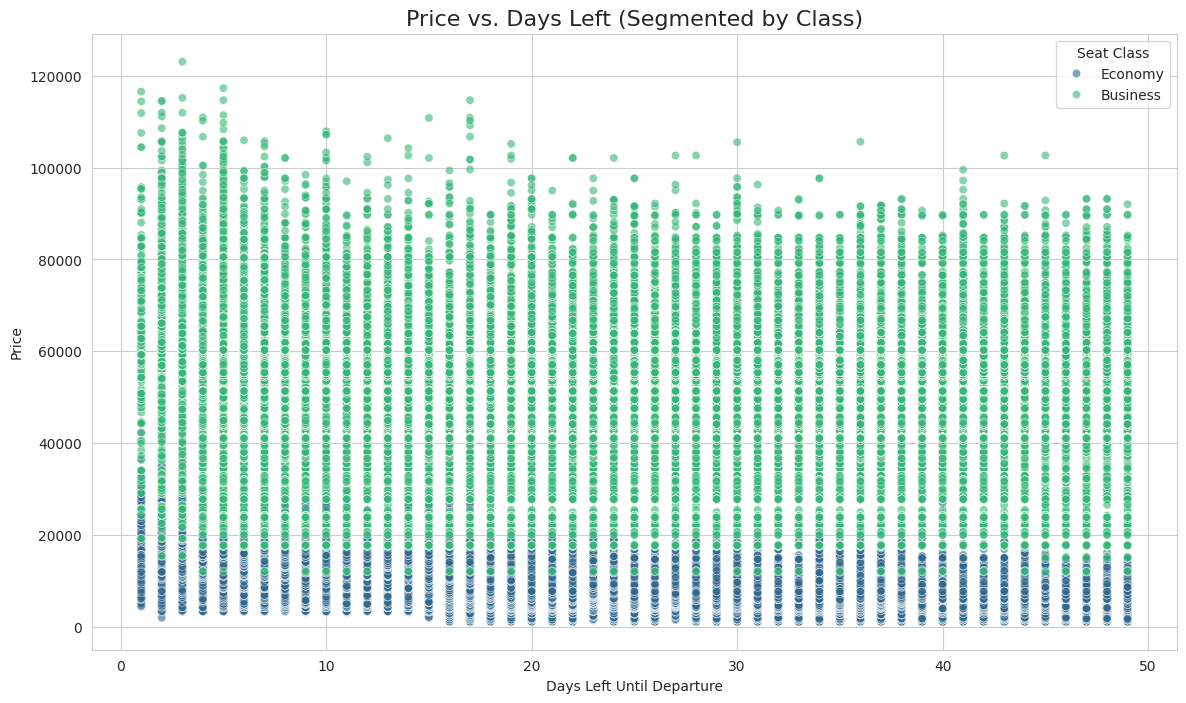

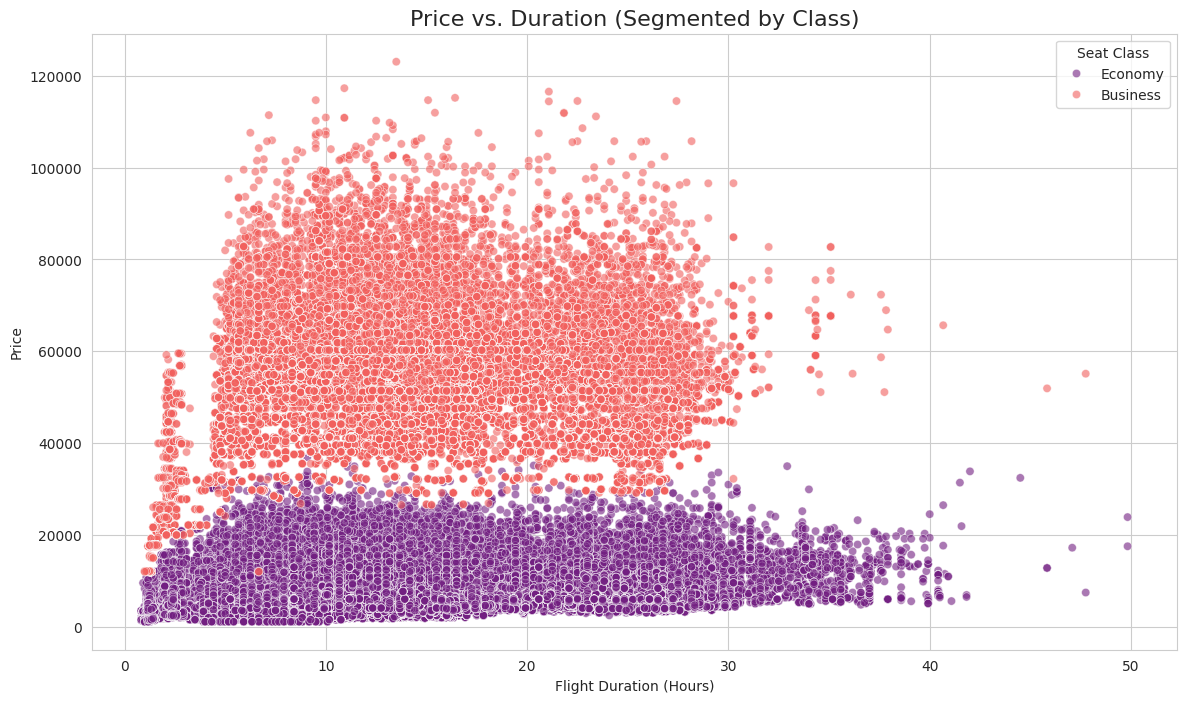

In [13]:
# --- 2. Segmented Scatter Plots using hue='class' ---

# Scatter plot for Price vs. Days Left, segmented by Class
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='days_left', y='price', hue='class', alpha=0.6, palette='viridis')
plt.title('Price vs. Days Left (Segmented by Class)', fontsize=16)
plt.xlabel('Days Left Until Departure')
plt.ylabel('Price')
plt.legend(title='Seat Class')
plt.show()


# Scatter plot for Price vs. Duration, segmented by Class
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='duration', y='price', hue='class', alpha=0.6, palette='magma')
plt.title('Price vs. Duration (Segmented by Class)', fontsize=16)
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Price')
plt.legend(title='Seat Class')
plt.show()


Successfully loaded 'flight_price.csv'.
Categorical columns to be analyzed: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

Cramér's V Association Matrix:
                   airline    flight  source_city  departure_time     stops  \
airline           1.000000  0.997406     0.061714        0.080553  0.173911   
flight            0.997406  1.000000     0.989535        0.987372  0.512002   
source_city       0.061714  0.989535     1.000000        0.082988  0.063481   
departure_time    0.080553  0.987372     0.082988        1.000000  0.076860   
stops             0.173911  0.512002     0.063481        0.076860  1.000000   
arrival_time      0.138788  0.466943     0.048681        0.149108  0.065957   
destination_city  0.064576  0.443687     0.206795        0.032344  0.101608   
class             0.448914  0.486736     0.027753        0.069922  0.132066   

                  arrival_time  destination_city     class  
airline   

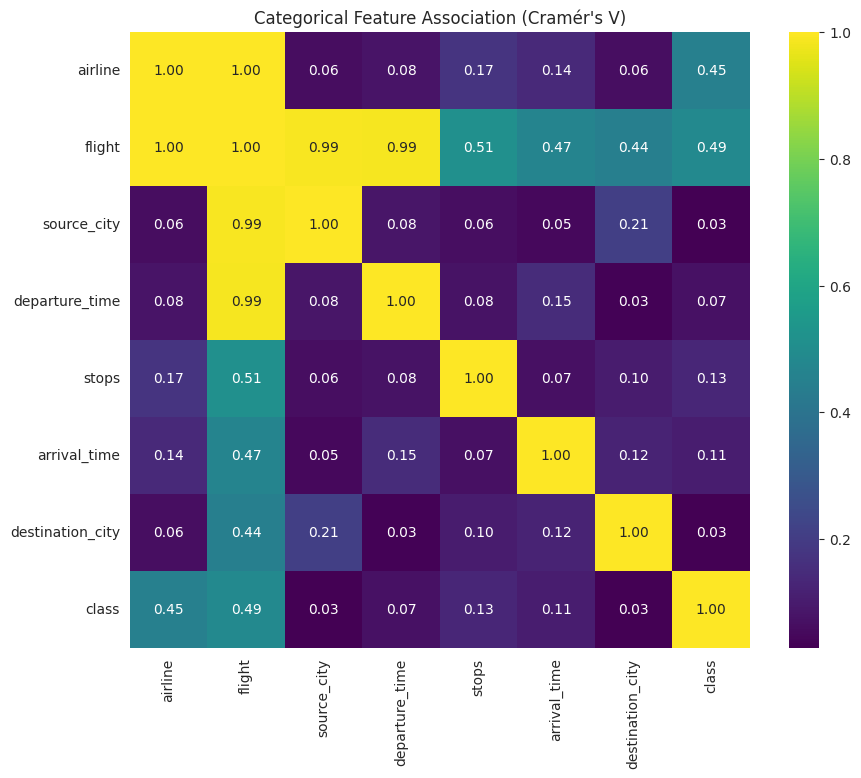

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# --- Load your original dataset (before encoding) ---
try:
    df = pd.read_csv('Clean_Dataset.csv')
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
    print("Successfully loaded 'flight_price.csv'.")
except FileNotFoundError:
    print("Error: 'flight_price.csv' not found. Please ensure it's in the correct directory.")
    exit()

# --- Select only the categorical columns for analysis ---
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns to be analyzed: {list(categorical_cols)}")


def cramers_v(x, y):
    """
    Calculates Cramér's V statistic for categorical-categorical association.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# --- Calculate Cramér's V for all pairs of categorical columns ---
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                                index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

print("\nCramér's V Association Matrix:")
print(cramers_v_matrix)

# --- Plot the heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Categorical Feature Association (Cramér's V)")
plt.show()



In [14]:
import pandas as pd
import numpy as np

# --- Configuration ---
# Define the input and output file paths
INPUT_FILE_PATH = 'Clean_Dataset.csv'
OUTPUT_FILE_PATH = 'processed_flight_price.csv'

print("--- Starting Data Preprocessing ---")

# --- 1. Load the Dataset ---
try:
    # Load the original dataset
    df = pd.read_csv(INPUT_FILE_PATH)
    print(f"Successfully loaded '{INPUT_FILE_PATH}'. Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{INPUT_FILE_PATH}' was not found.")
    print("Please make sure your raw data file is in the same directory and named correctly.")
    # Exit the script if the file doesn't exist
    exit()


--- Starting Data Preprocessing ---
Successfully loaded 'Clean_Dataset.csv'. Shape: (300153, 12)


In [15]:
# --- 2. Clean and Prepare Data ---

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Dropped 'Unnamed: 0' column.")

# Drop the high-cardinality 'flight' column
if 'flight' in df.columns:
    df = df.drop('flight', axis=1)
    print("Dropped 'flight' column due to high cardinality.")


Dropped 'Unnamed: 0' column.
Dropped 'flight' column due to high cardinality.


In [16]:
# --- 3. Feature Engineering ---
print("\n--- Starting Feature Engineering ---")

# Create a 'route' feature from source and destination cities
if 'source_city' in df.columns and 'destination_city' in df.columns:
    df['route'] = df['source_city'] + '_' + df['destination_city']
    # Drop the original city columns as they are now redundant
    df = df.drop(['source_city', 'destination_city'], axis=1)
    print("Created 'route' feature and dropped original city columns.")

# Create 'booking_urgency' bins from 'days_left'
if 'days_left' in df.columns:
    bins = [0, 3, 7, 15, 50]
    labels = ['Last_Minute', 'One_Week_Out', 'Two_Weeks_Out', 'Advance_Booking']
    df['booking_urgency'] = pd.cut(df['days_left'], bins=bins, labels=labels, right=True)
    # Drop the original 'days_left' column
    df = df.drop('days_left', axis=1)
    print("Created 'booking_urgency' feature and dropped 'days_left' column.")



--- Starting Feature Engineering ---
Created 'route' feature and dropped original city columns.
Created 'booking_urgency' feature and dropped 'days_left' column.


In [17]:
# --- 4. Prepare Target Variable and Encode Features ---

# Apply log transformation to the 'price' column to create the target variable
# We use np.log1p which calculates log(1 + x) to handle potential zero values
df['log_price'] = np.log1p(df['price'])
print("\nApplied log transformation to 'price' column, creating 'log_price'.")

# Drop the original 'price' column from the final dataset
df = df.drop('price', axis=1)
print("Dropped original 'price' column.")

# Identify all categorical columns for one-hot encoding
# This will now include our new engineered features like 'route' and 'booking_urgency'
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"\nIdentified categorical columns for encoding: {list(categorical_cols)}")

# Apply one-hot encoding using pandas get_dummies
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Applied one-hot encoding to categorical columns.")
print(f"The original {len(categorical_cols)} categorical columns were converted into {df_processed.shape[1] - df.shape[1] + len(categorical_cols)} new columns.")



Applied log transformation to 'price' column, creating 'log_price'.
Dropped original 'price' column.

Identified categorical columns for encoding: ['airline', 'departure_time', 'stops', 'arrival_time', 'class', 'route', 'booking_urgency']
Applied one-hot encoding to categorical columns.
The original 7 categorical columns were converted into 50 new columns.


In [18]:

# --- 5. Final Review and Save ---

# Display the first few rows of the fully processed dataframe
print("\n--- Reviewing Processed Data ---")
print("Head of the final, processed DataFrame:")
print(df_processed.head())

# Display the shape of the final dataframe
print(f"\nFinal shape of the processed data: {df_processed.shape}")
print("The data is now all-numeric and ready for model training.")

# Save the processed dataframe to a new CSV file
try:
    df_processed.to_csv(OUTPUT_FILE_PATH, index=False)
    print(f"\nSuccessfully saved the processed data to '{OUTPUT_FILE_PATH}'.")
    print("You can now use this file to train your machine learning model.")
except Exception as e:
    print(f"\nError saving the file: {e}")



--- Reviewing Processed Data ---
Head of the final, processed DataFrame:
   duration  log_price  airline_Air_India  airline_GO_FIRST  airline_Indigo  \
0      2.17   8.691819                  0                 0               0   
1      2.33   8.691819                  0                 0               0   
2      2.17   8.692322                  0                 0               0   
3      2.25   8.692154                  0                 0               0   
4      2.33   8.692154                  0                 0               0   

   airline_SpiceJet  airline_Vistara  departure_time_Early_Morning  \
0                 1                0                             0   
1                 1                0                             1   
2                 0                0                             1   
3                 0                1                             0   
4                 0                1                             0   

   departure_time_Evening  dep